# Finance 5330 - Homework1

## -- Jared Hansen, A01439768
## -- Due: Thursday, 02/01/2019

### *** $\textbf{NOTE:}$ the data are zipped together with this notebook, so the notebook can be run without modifying any file paths or additional pre-processing.

$\textbf{Assignment Description}$

Consider the daily stock returns of American Express (AXP), Caterpillar (CAT), and Starbucks (SBUX) from January 1999 to December 2008. The data are daily prices in the file stock-data-hwk1.txt.

    (a) Calculate simple returns for the three series.

    (b) Express the simple returns in percentages. Compute the sample mean, standard deviation, skewness, excess kurtosis, minimum, and maximum of the percentage simple returns.

    (c) Transform the simple returns to log returns.

    (d) Express the log returns in percentages. Compute the sample mean, standard deviation, skewness, excess kurtosis, minimum, and maximum of the percentage log returns.

    (e) Test the null hypothesis that the mean of the log returns of each stock is zero. That is, perform three separate tests. Use 5% significance level to draw your conclusion.

    (f) Plot histograms for each of the three series (both simple and log returns - so six graphs total).

    (g) Test the null hypothesis that the lag-$2$ autocorrelation is zero for log returns.




# Import statements

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

# Function Definitions

In [2]:
def compute_rtns_series(log_bool, simp_v_pct, orig_series):
    """
    This function computes the series of returns for the passed-in time series
    array. See the Returns section below for the 4 types of returns we can
    calculate and output with this function.
    
    Parameters
    ----------
    log_bool : bool
        This indicates whether or not the computed series of returns should be
        log-transformed (True) or not (False).
    simp_v_pct : string
        This indicates whether or not the computed series should be in the 
        form of simple (net) returns ("net") or simple returns expressed as
        percentages ("pct").
    orig_series : numpy ndarray
        The original 1-dimensional time series array.
        
    Returns
    -------
    rtns_series : numpy ndarray
        The final 1-dimensional time series array: either simple gross returns,
        simple net (pctg) returns, simple gross log returns, or simple
        net (pctg) log returns.
    """
    # This deletes the first element of the series to create the array of numerator values for the gross returns.
    grs_rtns_numrtr = np.delete(orig_series, 0)
    # This deletes the last element of the series to create the array of denominator values for the gross returns.
    grs_rtns_denmtr = np.delete(orig_series, len(orig_series) - 1)
    # The below chunk will calculate the series of returns (rtns_series)
    # according to whether we want "simp" (outer if chunk) or "pct" (outer
    # else chunk) and log returns (inner if for each outer chunk) or not.
    grs_rtns = grs_rtns_numrtr/grs_rtns_denmtr
    if(simp_v_pct == "simp"):
        rtns_series = grs_rtns - 1
        if(log_bool):
            rtns_series = np.log(grs_rtns)
    elif(simp_v_pct == "pct"):
        rtns_series = 100 * (grs_rtns - 1)
        if(log_bool):
            rtns_series = 100 * np.log(grs_rtns)
    return rtns_series


def compute_print_stats(log_bool, orig_series):
    """
    This function computes and prints the desired statistics (sample mean,
    standard deviation, skewness, excess kurtosis, minimum, maximum) of the
    given time series array that has been converted to percentages.
    The input time series array should be in its original form.
    
    Parameters
    ----------
    log_bool : bool
        This indicates whether or not the computed series of returns should be
        log-transformed (True) or not (False).
    orig_series : numpy ndarray
        The original 1-dimensional array of time series values (stock prices).
    
    Returns
    -------
    Nothing (prints information instead)
    """
    # Set the simp_v_pct arg = to "pct" since we're calculating pctg returns.
    rtns_as_pctgs = compute_rtns_series(log_bool, "pct", orig_series)
    rtns_mean = np.mean(rtns_as_pctgs)
    rtns_stDev = np.std(rtns_as_pctgs)
    rtns_skew = sp.stats.skew(rtns_as_pctgs)
    rtns_kurt = sp.stats.kurtosis(rtns_as_pctgs)
    rtns_min = np.min(rtns_as_pctgs)
    rtns_max = np.max(rtns_as_pctgs)
    print("The mean of this series is            :", rtns_mean)
    print("The stDev of this series is           :", rtns_stDev)
    print("The skewness of this series is        :", rtns_skew)
    print("The excess kurtosis of this series is :", rtns_kurt)
    print("The minimum value of this series is   :", rtns_min)
    print("The maximum value of this series is   :", rtns_max)
    #== NOTE: I looked up the difference between kurtosis and excess kurtosis:
    #==       [excess kurtosis = kurtosis - 3]. The default value of the
    #==       "fisher" argument is True for the sp.stats.kurtosis() function.
    #==       This default calculates excess kurtosis, so my code is correct.


def hyp_test_lag2(series, rho_hat, ticker):
    """
    This function calculates the test statistic for determining whether or not the
    lagged-l autocorrelation for a series is 0.
    --- H_0: the series has lagged-l autocorrelation = 0
    --- H_A: the series has lagged-l autocorrelation != 0
    Since the sample size for each of the series is 2514, this is a large 
    enough number that we can just use the standard normal distribution instead
    of a t-distn for computing the threshold for reject/not reject.
        That being the case, the threshold for rejecting H_0 is a test statistic
    with an absolute value of > 1.96. The function prints a message giving the
    computed test statistic and the result relative to reject/not H_0.
    
    Parameters
    ----------
    series : numpy ndarray
        This is the original series. We just use it for obtaining sample size
    rho_hat : float
        This is the empirically estimated value of the autocorrelation (in this
        case, lag-2 autocorr).
    ticker : string
        The ticker symbol of the series for which we're testing the hypothesis.
        
    Returns
    -------
        Nothing (prints message).
    """
    test_stat = (np.sqrt(len(series)) * rho_hat)
    if(abs(test_stat) > 1.96):
        print("\nSince the value of the test statistic [ sqrt(T)*\hat{rho_2} =",
              round(test_stat, 4), "] > |1.96| we reject the null hypothesis",
              "that the lag-2 autocorrelation is 0 for ", ticker, ". This",
              "implies that the data give evidence that lag-2 autocorrelation",
              "is a value other than 0.")
    else:
        print("\nSince the value of the test statistic [ sqrt(T)*\hat{rho_2} = ",
              round(test_stat, 4), "] < |1.96| we fail to reject the null",
              "hypothesis that the lag-2 autocorrelation is 0 for", ticker, ".")



# Data pre-processing.

In [3]:
# Import the full CSV file.
raw_data = pd.read_csv("stock-data-hwk1.csv")

# Brough's code (thanks!) for separating into the data for each stock.
tickers = ['AXP', 'CAT', 'SBUX']

ind = raw_data.TICKER == tickers[0]
axp_data = raw_data[ind]

ind = raw_data.TICKER == tickers[1]
cat_data = raw_data[ind]

ind = raw_data.TICKER == tickers[2]
sbux_data = raw_data[ind]

## QUESTION A
Calculate the simple returns for the three series

**$\textbf{NOTE}:$ I take "simple returns" to mean the simple net returns. Also, since the problem doesn't specify whether or not to display these calculations, I'll just show the first few values and last few values of each series using the NumPy view function.

In [4]:
# Create numpy ndarrays to store the price series for each stock
axp_prcs = np.array(axp_data.PRC)
cat_prcs = np.array(cat_data.PRC)
sbux_prcs = np.array(sbux_data.PRC)

In [5]:
simp_net_rtns_AXP = compute_rtns_series(False, "simp", axp_prcs)
print("\nThe first and last values for the series of simple (net) returns for",
      "the AXP (American Express) stock series:\n", simp_net_rtns_AXP.view())


The first and last values for the series of simple (net) returns for the AXP (American Express) stock series:
 [-0.01908867  0.04080352  0.01206273 ... -0.01172529  0.01694915
  0.03055556]


In [6]:
simp_net_rtns_CAT = compute_rtns_series(False, "simp", cat_prcs)
print("\nThe first and last values for the series of simple (net) returns for",
      "the CAT (Caterpillar) stock series:\n", simp_net_rtns_CAT.view())


The first and last values for the series of simple (net) returns for the CAT (Caterpillar) stock series:
 [-0.00263852  0.02645503  0.00902062 ... -0.00889513  0.03117619
  0.0231333 ]


In [7]:
simp_net_rtns_SBUX = compute_rtns_series(False, "simp", sbux_prcs)
print("\nThe first and last values for the series of simple (net) returns for",
      "the SBUX (Starbucks) stock series:\n", simp_net_rtns_SBUX.view())


The first and last values for the series of simple (net) returns for the SBUX (Starbucks) stock series:
 [-0.03480278 -0.00841346  0.00363636 ... -0.0342246   0.03654485
  0.01068376]


## QUESTION B
Express the simple returns in percentages. Compute the sample mean, standard deviation, skewness, excess kurtosis, minimum, and maximum of the percentage simple returns.

** $\textbf{NOTE:}$ I looked up the difference between kurtosis and excess kurtosis: [excess kurtosis = kurtosis - 3]. The default value of the "fisher" argument is True for the sp.stats.kurtosis() function that I used. This default calculates excess kurtosis, so my code is outputting the correct values for kurtosis (this is true of $\textbf{QUESTION D}$ as well.

In [8]:
simp_net_pctg_AXP = compute_rtns_series(False, "pct", axp_prcs)
print("\nThe first and last values for the series of simple (net) returns in",
      "percentages for the AXP (American Express) stock series:\n",
      simp_net_pctg_AXP.view())
compute_print_stats(False, axp_prcs)


The first and last values for the series of simple (net) returns in percentages for the AXP (American Express) stock series:
 [-1.908867    4.08035154  1.20627262 ... -1.17252931  1.69491525
  3.05555556]
The mean of this series is            : -0.02106031140329446
The stDev of this series is           : 2.7818593435948444
The skewness of this series is        : -5.208313956471862
The excess kurtosis of this series is : 124.44294069288469
The minimum value of this series is   : -65.47515257192677
The maximum value of this series is   : 17.926565874730027


In [9]:
simp_net_pctg_CAT = compute_rtns_series(False, "pct", cat_prcs)
print("\nThe first and last values for the series of simple (net) returns in",
      "percentages for the CAT (Caterpillar) stock series:\n",
      simp_net_pctg_CAT.view())
compute_print_stats(False, cat_prcs)


The first and last values for the series of simple (net) returns in percentages for the CAT (Caterpillar) stock series:
 [-0.26385224  2.64550265  0.90206186 ... -0.88951311  3.11761927
  2.31333028]
The mean of this series is            : 0.028502911305367418
The stDev of this series is           : 2.3797029209123965
The skewness of this series is        : -3.4432131904258063
The excess kurtosis of this series is : 73.34092966313085
The minimum value of this series is   : -48.918269230769226
The maximum value of this series is   : 14.72293067470436


In [10]:
simp_net_pctg_SBUX = compute_rtns_series(False, "pct", sbux_prcs)
print("\nThe first and last values for the series of simple (net) returns in",
      "percentages for the SBUX (Starbucks) stock series:\n",
      simp_net_pctg_SBUX.view())
compute_print_stats(False, sbux_prcs)


The first and last values for the series of simple (net) returns in percentages for the SBUX (Starbucks) stock series:
 [-3.48027842 -0.84134615  0.36363636 ... -3.42245989  3.65448505
  1.06837607]
The mean of this series is            : -0.012275574677963768
The stDev of this series is           : 3.1514480188676695
The skewness of this series is        : -4.254069534905932
The excess kurtosis of this series is : 67.94989625616
The minimum value of this series is   : -49.300127249590986
The maximum value of this series is   : 14.635364635364635


## QUESTION C
Transform the simple returns to log returns.

**$\textbf{NOTE:}$ I just use my function (compute_rtns_series) to make these calculations rather than explicitly converting the simple net returns series.

In [11]:
simp_net_log_rtns_AXP = compute_rtns_series(True, "simp", axp_prcs)
print("\nThe first and last values for the series of simple (net)",
      "log-transformed returns for the AXP (American Express) stock series:\n",
      simp_net_log_rtns_AXP.view())


The first and last values for the series of simple (net) log-transformed returns for the AXP (American Express) stock series:
 [-0.01927321  0.03999303  0.01199055 ... -0.01179458  0.01680712
  0.03009803]


In [12]:
simp_net_log_rtns_CAT = compute_rtns_series(True, "simp", cat_prcs)
print("\nThe first and last values for the series of simple (net)",
      "log-transformed returns for the CAT (Caterpillar) stock series:\n",
      simp_net_log_rtns_CAT.view())


The first and last values for the series of simple (net) log-transformed returns for the CAT (Caterpillar) stock series:
 [-0.00264201  0.02611114  0.00898018 ... -0.00893493  0.03070009
  0.02286978]


In [13]:
simp_net_log_rtns_SBUX = compute_rtns_series(True, "simp", sbux_prcs)
print("\nThe first and last values for the series of simple (net)",
      "log-transformed returns for the SBUX (Starbucks) stock series:\n",
      simp_net_log_rtns_SBUX.view())


The first and last values for the series of simple (net) log-transformed returns for the SBUX (Starbucks) stock series:
 [-0.03542283 -0.00844905  0.00362977 ... -0.03482398  0.03589292
  0.01062709]


## QUESTION D
Express the log returns in percentages. Compute the sample mean, standard deviation, skewness, excess kurtosis, minimum, and maximum of the percentage log returns.

In [14]:
simp_net_log_pctg_AXP = compute_rtns_series(True, "pct", axp_prcs)
print("\nThe first and last values for the series of simple, percentage, "
      "log-transformed returns for the AXP (American Express) stock series:\n",
      simp_net_log_pctg_AXP.view())
compute_print_stats(True, axp_prcs)


The first and last values for the series of simple, percentage, log-transformed returns for the AXP (American Express) stock series:
 [-1.92732108  3.99930258  1.19905513 ... -1.17945765  1.68071183
  3.00980312]
The mean of this series is            : -0.06760497253096258
The stDev of this series is           : 3.250984118634498
The skewness of this series is        : -14.039732454205941
The excess kurtosis of this series is : 454.51523321025877
The minimum value of this series is   : -106.349090587489
The maximum value of this series is   : 16.4891921658671


In [15]:
simp_net_log_pctg_CAT = compute_rtns_series(True, "pct", cat_prcs)
print("\nThe first and last values for the series of simple, percentage, "
      "log-transformed returns for the CAT (Caterpillar) stock series:\n",
      simp_net_log_pctg_CAT.view())
compute_print_stats(True, cat_prcs)


The first and last values for the series of simple, percentage, log-transformed returns for the CAT (Caterpillar) stock series:
 [-0.26420095  2.6111144   0.89801758 ... -0.89349289  3.07000854
  2.28697842]
The mean of this series is            : -0.002338604933912478
The stDev of this series is           : 2.552581031199145
The skewness of this series is        : -7.359209620637977
The excess kurtosis of this series is : 191.7800773646962
The minimum value of this series is   : -67.17432718967918
The maximum value of this series is   : 13.73497368645352


In [16]:
simp_net_log_pctg_SBUX = compute_rtns_series(True, "pct", sbux_prcs)
print("\nThe first and last values for the series of simple, percentage, "
      "log-transformed returns for the SBUX (Starbucks) stock series:\n",
      simp_net_log_pctg_SBUX.view())
compute_print_stats(True, sbux_prcs)


The first and last values for the series of simple, percentage, log-transformed returns for the SBUX (Starbucks) stock series:
 [-3.54228298 -0.84490545  0.36297681 ... -3.48239759  3.58929231
  1.06270926]
The mean of this series is            : -0.06919626751631369
The stDev of this series is           : 3.5174870649951577
The skewness of this series is        : -7.957977030094453
The excess kurtosis of this series is : 146.71916527166977
The minimum value of this series is   : -67.92467852479692
The maximum value of this series is   : 13.658616261947962


## QUESTION E
Test the null hypothesis that the mean of the log returns of each stock is zero. That is, perform three separate tests. Use 5% significance level to draw your conclusion.

**$\textbf{NOTE}:$ from scipy.stats I use the ttest_1samp(a, popmean) function. It's a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.
Even though this says "...sample of independent observations" we are going to use it as-is since we aren't worrying about time dependence structure for this problem (we assume that log returns are iid).

In [17]:
sp.stats.ttest_1samp(simp_net_log_rtns_AXP, 0)

Ttest_1sampResult(statistic=-1.0424615297012625, pvalue=0.2972980266169851)

The calculated p-value 0.297298 $\implies$ that we fail to reject $H_0$, where $H_0: \mu_{\{{ln(AXP)}\}} = 0$.
This is borne out visually in the histogram of log returns for AXP (see below).

In [18]:
sp.stats.ttest_1samp(simp_net_log_rtns_CAT, 0)

Ttest_1sampResult(statistic=-0.045927580634719516, pvalue=0.9633716203900826)

The calculated p-value 0.96337 $\implies$ that we fail to reject $H_0$, where $H_0: \mu_{\{{ln(CAT)}\}} = 0$.
This is borne out visually in the histogram of log returns for CAT (see below).

In [19]:
sp.stats.ttest_1samp(simp_net_log_rtns_SBUX, 0)

Ttest_1sampResult(statistic=-0.9861577775936335, pvalue=0.3241506312100979)

The calculated p-value 0.324215 $\implies$ that we fail to reject $H_0$, where $H_0: \mu_{\{{ln(SBUX)}\}} = 0$.
This is borne out visually in the histogram of log returns for SBUX (see below).

## QUESTION F
Plot histograms for each of the three series (both simple and log returns - so six graphs total).

**$\textbf{NOTE:}$ we can deduce that there are some outliers for each of the 6 plots. We know this because the x-axis scale for each plot extends a ways past where we'd (visually) expect it to end based on where the mass of the respective distributions are centered. The x-axis scales were constructed using the minimum and maximum values of the returns series, so we can know this for a fact. We could filter the data (if we wanted) to find these extreme low values. My bet is that they are coming from very bad stretches in market history. If these data are coverin 1999 - 2008, I'd bet the extreme low values are coming from the 2007 - 2008 financial crash, or possibly the dot-com bubble burst in the early 2000's.

**$\textbf{NOTE:}$ Apparently certain matplotlib functions don't play as nicely with Jupyter notebooks (but worked fine in my IDE). I wanted the plots below t0 show up as a nice 2x3 single plot, but instead I had to comment out code so they're individually displayed.

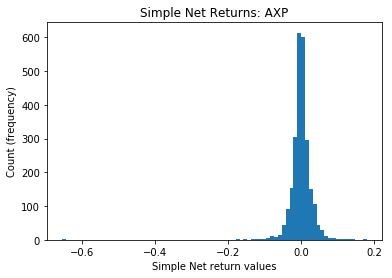

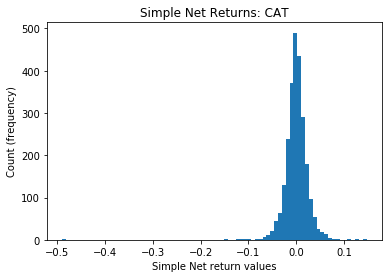

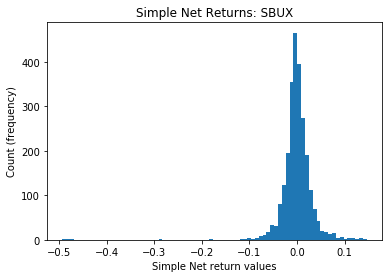

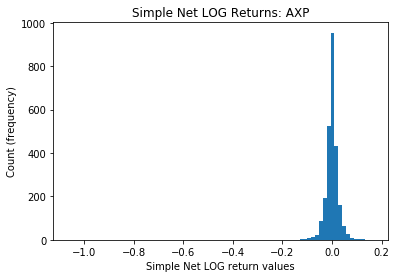

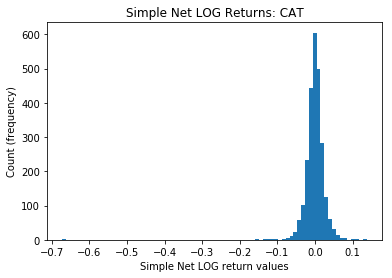

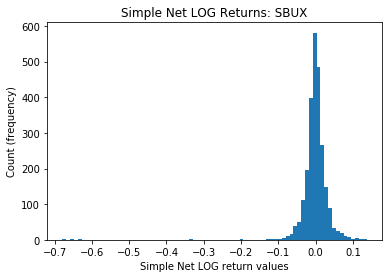

In [20]:
#plt.figure(1)

#plt.subplot(2, 3, 1)
plt.hist(simp_net_rtns_AXP,
         bins = np.linspace(min(simp_net_rtns_AXP),
                            max(simp_net_rtns_AXP),
                            80))
plt.xlabel("Simple Net return values")
plt.ylabel("Count (frequency)")
plt.title("Simple Net Returns: AXP")
plt.show()

#plt.subplot(2, 3, 2)
plt.hist(simp_net_rtns_CAT,
         bins = np.linspace(min(simp_net_rtns_CAT),
                            max(simp_net_rtns_CAT),
                            80))
plt.xlabel("Simple Net return values")
plt.ylabel("Count (frequency)")
plt.title("Simple Net Returns: CAT")
plt.show()

#plt.subplot(2, 3, 3)
plt.hist(simp_net_rtns_SBUX,
         bins = np.linspace(min(simp_net_rtns_SBUX),
                            max(simp_net_rtns_SBUX),
                            80))
plt.xlabel("Simple Net return values")
plt.ylabel("Count (frequency)")
plt.title("Simple Net Returns: SBUX")
plt.show()

#plt.subplot(2, 3, 4)
plt.hist(simp_net_log_rtns_AXP,
         bins = np.linspace(min(simp_net_log_rtns_AXP),
                            max(simp_net_log_rtns_AXP),
                            80))
plt.xlabel("Simple Net LOG return values")
plt.ylabel("Count (frequency)")
plt.title("Simple Net LOG Returns: AXP")
plt.show()

#plt.subplot(2, 3, 5)
plt.hist(simp_net_log_rtns_CAT,
         bins = np.linspace(min(simp_net_log_rtns_CAT),
                            max(simp_net_log_rtns_CAT),
                            80))
plt.xlabel("Simple Net LOG return values")
plt.ylabel("Count (frequency)")
plt.title("Simple Net LOG Returns: CAT")
plt.show()

#plt.subplot(2, 3, 6)
plt.hist(simp_net_log_rtns_SBUX,
         bins = np.linspace(min(simp_net_log_rtns_SBUX),
                            max(simp_net_log_rtns_SBUX),
                            80))
plt.xlabel("Simple Net LOG return values")
plt.ylabel("Count (frequency)")
plt.title("Simple Net LOG Returns: SBUX")
plt.show()

#plt.subplots_adjust(top=0.85, bottom=0.12, left=0.10, right=0.95, hspace=0.55, wspace=0.35)

#plt.suptitle("Top Row: simple returns, Bottom Row: simple LOG returns")
#plt.show()

## QUESTION G
Test the null hypothesis that the lag-2 autocorrelation is zero for log returns.

**$\textbf{NOTE:}$ The test statistic I calculated was $\big(\sqrt{T}\big) \big(\hat{\rho_2}\big)$ where $\sqrt{T}$ is the number of elements in the series and $\hat{\rho_2}$ is the empirically-estimated lag-2 autocorrelation. Since all of the time series have 2514 elements (2514 prices), this is asymptotically approaching the normal distribution ($n \to \infty$ in some sense). As such, I used a standard normal distribution cutoff instead of a $t$-distribution decision rule.
For significance level $\alpha = 0.05$ this means the cutoff threshold for reject/not reject is a test statistic with absolute value > 1.96.

In [21]:
# Calculate the value of the lag-2 autocorrelations for each stock.
rho_axp = pd.Series(simp_net_log_rtns_AXP).autocorr(lag=2)
rho_cat = pd.Series(simp_net_log_rtns_CAT).autocorr(lag=2)
rho_sbux = pd.Series(simp_net_log_rtns_SBUX).autocorr(lag=2)

In [22]:
hyp_test_lag2(simp_net_log_rtns_AXP, rho_axp, "AXP")


Since the value of the test statistic [ sqrt(T)*\hat{rho_2} = -2.5389 ] > |1.96| we reject the null hypothesis that the lag-2 autocorrelation is 0 for  AXP . This implies that the data give evidence that lag-2 autocorrelation is a value other than 0.


To reiterate the output of the above function:
The value of the test statistic for American Express (AXP) is $\bigg[\big(\sqrt{T}\big) \big(\hat{\rho_2}\big) = -2.5389\bigg] > \bigg[ |1.96| \bigg] \implies$ we reject $H_0$ (where $H_0: \rho_2 = 0$ and $H_A: \rho_2 \ne 0$). This implies that the data give evidence that lag-2 autocorrelation, $\rho_2$, is a value other than 0.

In [23]:
hyp_test_lag2(simp_net_log_rtns_CAT, rho_cat, "CAT")


Since the value of the test statistic [ sqrt(T)*\hat{rho_2} =  -1.5042 ] < |1.96| we fail to reject the null hypothesis that the lag-2 autocorrelation is 0 for CAT .


To reiterate the output of the above function:
The value of the test statistic for Caterpillar (CAT) is $\bigg[\big(\sqrt{T}\big) \big(\hat{\rho_2}\big) = -1.5042\bigg] < \bigg[ |1.96| \bigg] \implies$ we fail to reject $H_0$ (where $H_0: \rho_2 = 0$ and $H_A: \rho_2 \ne 0$).

In [24]:
hyp_test_lag2(simp_net_log_rtns_SBUX, rho_sbux, "SBUX")


Since the value of the test statistic [ sqrt(T)*\hat{rho_2} =  -0.6816 ] < |1.96| we fail to reject the null hypothesis that the lag-2 autocorrelation is 0 for SBUX .


To reiterate the output of the above function:
The value of the test statistic for Starbucks (SBUX) is $\bigg[\big(\sqrt{T}\big) \big(\hat{\rho_2}\big) = -0.6816\bigg] < \bigg[ |1.96| \bigg] \implies$ we fail to reject $H_0$ (where $H_0: \rho_2 = 0$ and $H_A: \rho_2 \ne 0$).